In [1]:
#Important imports
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

c:\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [5]:
# df = pd.read_csv(r'C:\Users\vladi\OneDrive\Desktop\Sigmoid\CV\CVC\heart.csv')
# df.values

In [6]:
class DataSet(Dataset):
    
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)
    
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i, :-1], self.dataset[i, -1]    

In [8]:
class Net(nn.Module):
    
    def __init__(self, n_features):
        super().__init__()
        self.n_features = n_features # 13
        
        # fully connected 
        self.fc1 = nn.Linear(self.n_features, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,1)
        
    def forward(self, x):
        
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))
        
        return out

In [ ]:
[1,0,1,0,0,1]

In [ ]:
[[0.8],
 [0.2],
 [0.1],
 [0.4]]

In [16]:
def training_loop(n_epoch, optimizer, model, loss_fn, train_loader, test_loader, print_plot):
    
    train_accuracy = torch.zeros(n_epoch)
    test_accuracy = torch.zeros(n_epoch)
    
    for epoch in range(n_epoch):
        
        for example, label in train_loader:
            
            example = example.to(DEVICE)
            label = label.to(DEVICE)
            
            label = label.unsqueeze(1)
            
            output = model(example.float())
            
            loss = loss_fn(output, label.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        with torch.no_grad():
            
            for loader, accuracy in [(train_loader, train_accuracy),(test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(device=DEVICE)
                    labels = labels.to(device=DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()

                accuracy[epoch] = correct / total

        if (epoch+1) % 10 ==0:
            print(f'Epoch {epoch+1})', 
                  f'Train Accuracy: {train_accuracy[epoch]}',
                  f'Test Accuracy: {test_accuracy[epoch]}')
            
    if print_plot:
        
        #Setting x-ticks
        epochs = range(n_epoch)

        #Ploting both curves, train and val 
        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

In [17]:
data = DataSet(r'C:\Users\vladi\OneDrive\Desktop\Sigmoid\CV\CVC\heart.csv')

n_sample = len(data)
n_test = int(0.2*n_sample)

train_set, test_set = torch.utils.data.random_split(data, [n_sample-n_test, n_test])

train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), shuffle = True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = len(test_set), shuffle = True)

Epoch 10) Train Accuracy: 0.47325101494789124 Test Accuracy: 0.36666667461395264
Epoch 20) Train Accuracy: 0.5267489552497864 Test Accuracy: 0.6166666746139526
Epoch 30) Train Accuracy: 0.6502057313919067 Test Accuracy: 0.4833333492279053
Epoch 40) Train Accuracy: 0.6913580298423767 Test Accuracy: 0.5666667222976685
Epoch 50) Train Accuracy: 0.7037037014961243 Test Accuracy: 0.6166666746139526
Epoch 60) Train Accuracy: 0.7160493731498718 Test Accuracy: 0.6666666865348816
Epoch 70) Train Accuracy: 0.7448559403419495 Test Accuracy: 0.6666666865348816
Epoch 80) Train Accuracy: 0.757201611995697 Test Accuracy: 0.6833333969116211
Epoch 90) Train Accuracy: 0.7613168358802795 Test Accuracy: 0.7166666984558105
Epoch 100) Train Accuracy: 0.798353910446167 Test Accuracy: 0.8000000715255737
Epoch 110) Train Accuracy: 0.806584358215332 Test Accuracy: 0.8000000715255737
Epoch 120) Train Accuracy: 0.8312757015228271 Test Accuracy: 0.8333333730697632
Epoch 130) Train Accuracy: 0.8230452537536621 Test

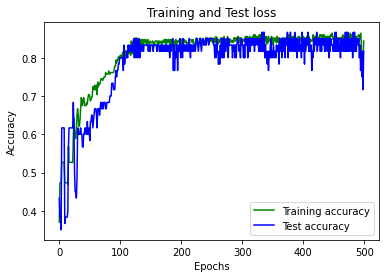

In [18]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
n_epoch = 500,
optimizer = optimizizer,
model = model,
loss_fn = loss_fn,
train_loader = train_loader,
test_loader = test_loader,
print_plot = True
)

c:\python38\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.47736623883247375 Test Accuracy: 0.38333335518836975
Epoch 20) Train Accuracy: 0.7160493731498718 Test Accuracy: 0.6500000357627869
Epoch 30) Train Accuracy: 0.7283950448036194 Test Accuracy: 0.6500000357627869
Epoch 40) Train Accuracy: 0.7242798209190369 Test Accuracy: 0.6833333969116211
Epoch 50) Train Accuracy: 0.7407407164573669 Test Accuracy: 0.7000000476837158
Epoch 60) Train Accuracy: 0.7448559403419495 Test Accuracy: 0.7166666984558105
Epoch 70) Train Accuracy: 0.757201611995697 Test Accuracy: 0.8166667222976685
Epoch 80) Train Accuracy: 0.8106995820999146 Test Accuracy: 0.8166667222976685
Epoch 90) Train Accuracy: 0.8189300298690796 Test Accuracy: 0.8500000238418579
Epoch 100) Train Accuracy: 0.8353909254074097 Test Accuracy: 0.8166667222976685
Epoch 110) Train Accuracy: 0.8395061492919922 Test Accuracy: 0.8333333730697632
Epoch 120) Train Accuracy: 0.8312757015228271 Test Accuracy: 0.7666667103767395
Epoch 130) Train Accuracy: 0.8518518209457397 Te

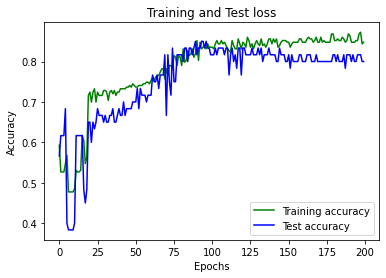

In [20]:
learning_rate = 0.01

model = Net(len(data[0][0])).to(DEVICE)

optimizizer = optim.Adam(model.parameters(), lr = learning_rate)

loss_fn = nn.BCELoss()

training_loop(
n_epoch = 200,
optimizer = optimizizer,
model = model,
loss_fn = loss_fn,
train_loader = train_loader,
test_loader = test_loader,
print_plot = True
)

In [11]:
predicted = [1,0,1,0,0]
labels = [1,1,1,0,1]

for x in range(len(labels)):
    print(predicted[x] == labels[x])

True
False
True
True
False
